In [49]:
import pandas
import seaborn

In [50]:
DATA_FILE: str = "../data/raw/DefaktS_Twitter_DS.jsonl"

In [91]:
dataset: pandas.DataFrame = (
    pandas.read_json(DATA_FILE, lines=True)
    .set_index("id")
    # drop unnamed column (no information given)
    .drop(columns=["Unnamed: 0"])
    # drop duplicates where only text is identical
    .drop_duplicates(subset=["text"])
    # drop non annotated samples (having no binary label == no human annotation?)
    .dropna(subset=["binary_label"])
)

(
    dataset
    [["text", "binary_label"]]
    .to_csv("../data/processed/DefaktS_Twitter.binary.csv")
)

dataset

,text,Comments,DateTime,Hashtags,Language,Username,LikeCount,QuoteCount,ReplyCount,RetweetCount,binary_label,span_labels
id,,,,,,,,,,,,
378394,Abtreibung ist nach der 13ten Wo. gleichbedeut...,[],2023-02-06 18:58:06,None,de,u1,1,0,0,0,1.0,"[[0, 10, corpkeyword], [0, 10, psychemo], [0, ..."
378395,"In #England, #Wales, #Schottland, #Frankreich,...",[],2023-02-06 16:30:08,"['England', 'Wales', 'Schottland', 'Frankreich...",de,u2,9,0,1,5,0.0,"[[0, 72, catneutral], [73, 145, catneutral], [..."
378396,Wie wahr; Die EU fördert statt Kinder und Fami...,[],2023-02-06 15:01:22,None,de,u3,0,0,0,0,1.0,"[[0, 70, infonewinfo], [0, 70, psychabas], [70..."
378397,"Gegen Abtreibung, Ehe nur zwischen Mann und Fr...",[],2023-02-06 14:56:55,"['AfD', 'Kirchen']",de,u4,3,0,1,0,0.0,"[[0, 81, catneutral], [6, 16, corpkeyword], [8..."
378398,"News: Spionage-Ballons, China, Robert Habeck, ...",[],2023-02-06 12:14:02,None,de,u5,0,0,0,0,0.0,"[[0, 80, catneutral], [81, 124, catneutral], [..."
...,...,...,...,...,...,...,...,...,...,...,...,...
523351,World War Two | 199 - Kursk: Soviets Dig-In fo...,[],2022-06-18 14:00:38,None,de,u11244,0,0,0,0,0.0,"[[0, 9, corpkeyword], [0, 80, catneutral]]"
523352,THEO VAN GOGH WATCH: ALLSEITIGE INTENSIVE VORB...,[],2022-06-17 11:17:50,None,de,u816,2,0,0,0,1.0,"[[0, 70, psychsensa], [0, 290, catposfake], [5..."
523353,World War Z\nmodern era version https://t.co/D...,[],2022-06-16 09:10:14,None,de,u11245,0,0,0,0,0.0,"[[0, 9, corpkeyword], [0, 11, catneutral]]"


In [92]:
dataset["binary_label"].value_counts()

binary_label
0.0    11771
1.0     8225
Name: count, dtype: int64

In [93]:
polar_annotations: pandas.DataFrame = (
    pandas.DataFrame([   
        dict(sample_id=index, code=item[2], span=item[:2])
        for index, item in
        dataset["span_labels"].explode().items()
        if type(item) is list
    ])
    .pipe(lambda _df: _df[~_df["code"].isin(["corpkeyword", "catposfake", "catneutral"])])
)
polar_annotations.head()

,sample_id,code,span
1,378394,psychemo,"[0, 10]"
3,378394,psychabas,"[0, 77]"
4,378394,typopinion,"[0, 77]"
6,378394,psychabas,"[78, 145]"
7,378394,typopinion,"[78, 145]"


<Axes: xlabel='count', ylabel='code'>

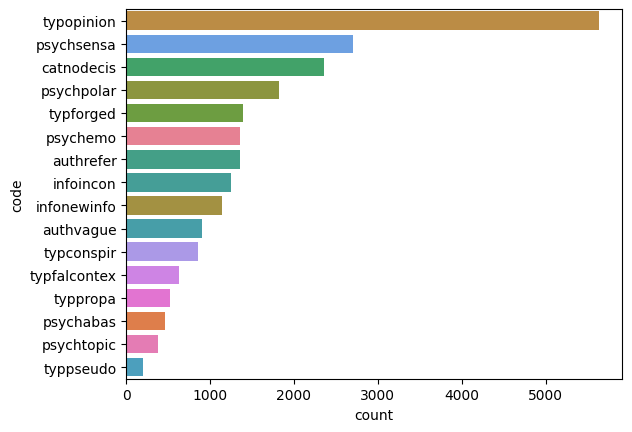

In [94]:
seaborn.countplot(
    polar_annotations,
    y="code",
    hue="code",
    order = polar_annotations["code"].value_counts().index
)

In [95]:
(
    polar_annotations
    .groupby("code")
    ["sample_id"]
    .value_counts()
    .describe(percentiles=[.75, .85, .95, .97, .99])
)

count    19920.000000
mean         1.153464
std          0.547822
min          1.000000
50%          1.000000
75%          1.000000
85%          1.000000
95%          2.000000
97%          2.000000
99%          4.000000
max         17.000000
Name: count, dtype: float64